# ModelNet Weak Generalization Classification - 10 Monte Carlo Runs

### This file shows the results for Modelnet data object classification accuracy and F1 plots over 250 epochs for both Set Trnasformer and PCT

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def plot_accuracy(results, labels, y_label, title,suptitle, multiplier = 1.96, accuracy_flag = True):
    f, a = plt.subplots(1,2, figsize = (12,5))
    for j, temp_results in enumerate(results):
        for i, result in enumerate(temp_results):
            a[j].plot(np.arange(0,result.shape[1]), np.mean(result,0), label=labels[j][i])
            a[j].fill_between(np.arange(0,result.shape[1]),
                             np.mean(result,0)+(multiplier*np.std(result,0)/np.sqrt(result.shape[0])), 
                             np.mean(result,0)-(multiplier*np.std(result,0)/np.sqrt(result.shape[0])), alpha=0.5)
            a[j].set_ylabel(y_label)
            a[j].set_xlabel('Epoch')
            a[j].legend()
            # if accuracy_flag:
            #     a[j].set_ylim([0.0,1.1])
            a[j].grid(True)
        a[j].set_title(title[j])
    plt.suptitle(suptitle)
    plt.show()


def single_plot_accuracy(results, labels, y_label, title, multiplier = 1.96, accuracy_flag = True):
    f, ax = plt.subplots(figsize = (6,5))
    # colors = ['C0','C1',  'C2', 'C3']
    # plt.style.use('default')
    for j, result in enumerate(results):
        ax.plot(np.arange(0,result.shape[1]), np.mean(result,0), label=labels[j])#, color=colors[j])
        ax.fill_between(np.arange(0,result.shape[1]),
                         np.mean(result,0)+(multiplier*np.std(result,0)/np.sqrt(result.shape[0])), 
                         np.mean(result,0)-(multiplier*np.std(result,0)/np.sqrt(result.shape[0])), alpha=0.5)
        ax.set_ylabel(y_label)
        ax.set_xlabel('Epoch')
        ax.legend()
        if accuracy_flag:
            ax.set_ylim([0.0,1.1])
        ax.grid(True)
    plt.title(title)
    # plt.suptitle(suptitle)
    plt.show()
    

def subplot_accuracies(results1, labels1, y_label1, results2, labels2, y_label2, suptitle, multiplier=1.96, accuracy_flag=True):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot for the first set of results
    ax1 = axs[0]
    for j, result in enumerate(results1):
        ax1.plot(np.arange(0, result.shape[1]), np.mean(result, 0), label=labels1[j])
        ax1.fill_between(np.arange(0, result.shape[1]),
                         np.mean(result, 0) + (multiplier * np.std(result, 0) / np.sqrt(result.shape[0])), 
                         np.mean(result, 0) - (multiplier * np.std(result, 0) / np.sqrt(result.shape[0])), 
                         alpha=0.5)
        ax1.set_ylabel(y_label1)
        ax1.set_xlabel('Epoch')
        ax1.legend()
        if accuracy_flag:
            ax1.set_ylim([0.0, 1.1])
        ax1.grid(True)
    
    # Plot for the second set of results
    ax2 = axs[1]
    for j, result in enumerate(results2):
        ax2.plot(np.arange(0, result.shape[1]), np.mean(result, 0), label=labels2[j])
        ax2.fill_between(np.arange(0, result.shape[1]),
                         np.mean(result, 0) + (multiplier * np.std(result, 0) / np.sqrt(result.shape[0])), 
                         np.mean(result, 0) - (multiplier * np.std(result, 0) / np.sqrt(result.shape[0])), 
                         alpha=0.5)
        ax2.set_ylabel(y_label2)
        ax2.set_xlabel('Epoch')
        ax2.legend()
        if accuracy_flag:
            ax2.set_ylim([0.0, 1.1])
        ax2.grid(True)
    
    fig.suptitle(suptitle)
    plt.show()
    

# ST

In [16]:
train_accuracies_contrast = np.loadtxt("./ModelNet_Results/ST/Contrastive/masked_encoder_160_512_150_200_64_16_128_3_0.05_True_False_pd1024_ed64_lr0.001_sndl_ST/train_accuracy.txt")
validation_accuracies_contrast = np.loadtxt("./ModelNet_Results/ST/Contrastive/masked_encoder_160_512_150_200_64_16_128_3_0.05_True_False_pd1024_ed64_lr0.001_sndl_ST/validation_accuracy.txt")


train_accuracies_naive = np.loadtxt("./ModelNet_Results/ST/Naive/ed64_nh16_ni128_bs32_ss256_vs128_epoch250/train_accuracy.txt")
validation_accuracies_naive = np.loadtxt("./ModelNet_Results/ST/Naive/ed64_nh16_ni128_bs32_ss256_vs128_epoch250/validation_accuracy.txt")

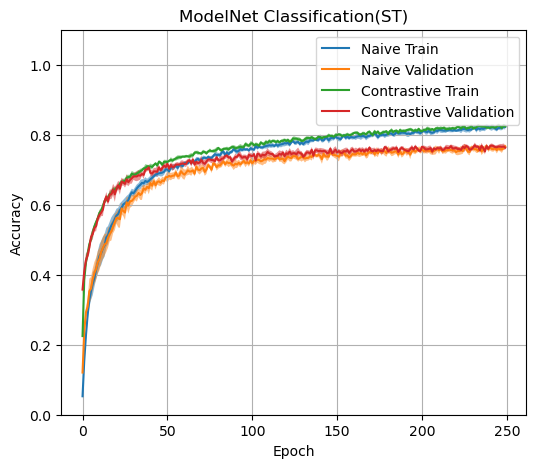

In [17]:
data = [train_accuracies_naive, validation_accuracies_naive, train_accuracies_contrast, validation_accuracies_contrast]
labels = ['Naive Train','Naive Validation','Contrastive Train','Contrastive Validation']
titles = 'ModelNet Classification(ST)'
single_plot_accuracy(data, labels, y_label = 'Accuracy', title = titles)

In [18]:
train_f1_contrast = np.loadtxt("./ModelNet_Results/ST/Contrastive/masked_encoder_160_512_150_200_64_16_128_3_0.05_True_False_pd1024_ed64_lr0.001_sndl_ST/train_f1.txt")
validation_f1_contrast = np.loadtxt("./ModelNet_Results/ST/Contrastive/masked_encoder_160_512_150_200_64_16_128_3_0.05_True_False_pd1024_ed64_lr0.001_sndl_ST/validation_f1.txt")


train_f1_naive = np.loadtxt("./ModelNet_Results/ST/Naive/ed64_nh16_ni128_bs32_ss256_vs128_epoch250/train_f1.txt")
validation_f1_naive = np.loadtxt("./ModelNet_Results/ST/Naive/ed64_nh16_ni128_bs32_ss256_vs128_epoch250/validation_f1.txt")

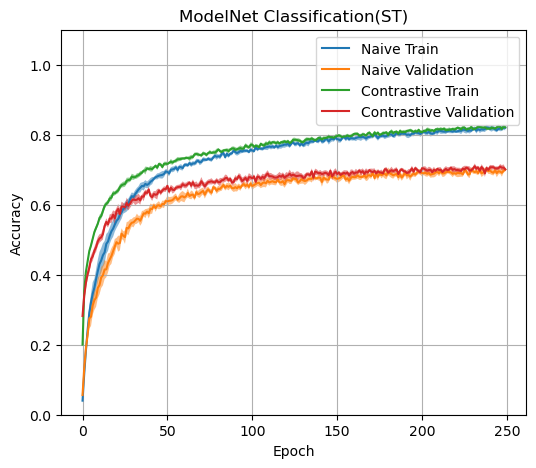

In [19]:
data = [train_f1_naive, validation_f1_naive, train_f1_contrast, validation_f1_contrast]
labels = ['Naive Train','Naive Validation','Contrastive Train','Contrastive Validation']
titles = 'ModelNet Classification(ST)'
single_plot_accuracy(data, labels, y_label = 'Accuracy', title = titles)

# PCT

In [20]:
train_accuracies_contrast_pct = np.loadtxt("./ModelNet_Results/pct/Contrastive/masked_encoder_160_512_150_200_pd1024_ed256_lr0.001_sndl_PCT_loss/train_accuracy.txt")
validation_accuracies_contrast_pct = np.loadtxt("./ModelNet_Results/pct/Contrastive/masked_encoder_160_512_150_200_pd1024_ed256_lr0.001_sndl_PCT_loss/validation_accuracy.txt")


train_accuracies_naive_pct = np.loadtxt("./ModelNet_Results/pct/Naive/ed256_do0.2_bs32_ss256_vss128/train_accuracy.txt")
validation_accuracies_naive_pct = np.loadtxt("./ModelNet_Results/pct/Naive/ed256_do0.2_bs32_ss256_vss128/validation_accuracy.txt")

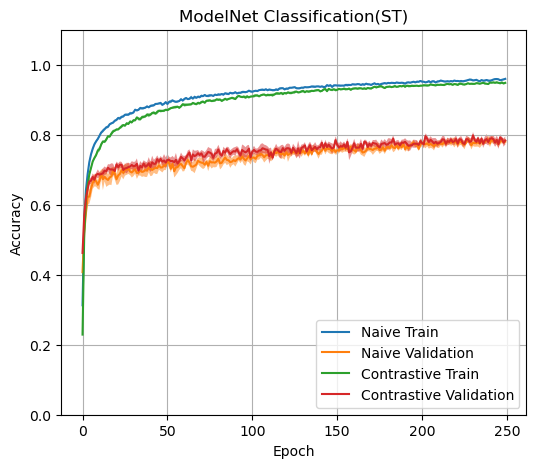

In [21]:
data = [train_accuracies_naive_pct, validation_accuracies_naive_pct, train_accuracies_contrast_pct, validation_accuracies_contrast_pct]
labels = ['Naive Train','Naive Validation','Contrastive Train','Contrastive Validation']
titles = 'ModelNet Classification(ST)'
single_plot_accuracy(data, labels, y_label = 'Accuracy', title = titles)

In [22]:
train_f1_contrast_pct = np.loadtxt("./ModelNet_Results/pct/Contrastive/masked_encoder_160_512_150_200_pd1024_ed256_lr0.001_sndl_PCT_loss/train_f1.txt")
validation_f1_contrast_pct = np.loadtxt("./ModelNet_Results/pct/Contrastive/masked_encoder_160_512_150_200_pd1024_ed256_lr0.001_sndl_PCT_loss/validation_f1.txt")


train_f1_naive_pct = np.loadtxt("./ModelNet_Results/pct/Naive/ed256_do0.2_bs32_ss256_vss128/train_f1.txt")
validation_f1_naive_pct = np.loadtxt("./ModelNet_Results/pct/Naive/ed256_do0.2_bs32_ss256_vss128/validation_f1.txt")

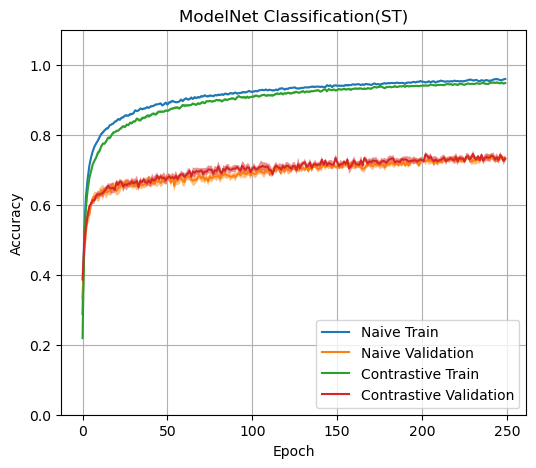

In [23]:
data = [train_f1_naive_pct, validation_f1_naive_pct, train_f1_contrast_pct, validation_f1_contrast_pct]
labels = ['Naive Train','Naive Validation','Contrastive Train','Contrastive Validation']
titles = 'ModelNet Classification(ST)'
single_plot_accuracy(data, labels, y_label = 'F1', title = titles)

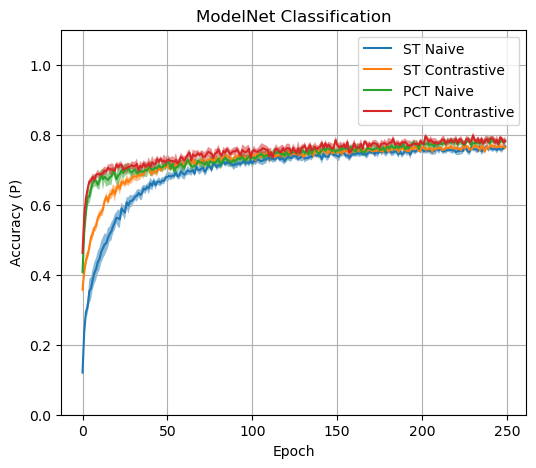

In [25]:
data = [validation_accuracies_naive, validation_accuracies_contrast, validation_accuracies_naive_pct, validation_accuracies_contrast_pct]
labels = ['ST Naive','ST Contrastive','PCT Naive','PCT Contrastive']
titles = 'ModelNet Classification'
single_plot_accuracy(data, labels, y_label = 'Accuracy (P)', title = titles)

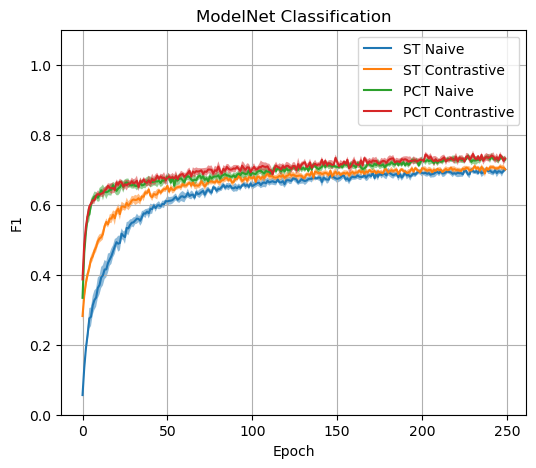

In [26]:
data = [validation_f1_naive, validation_f1_contrast, validation_f1_naive_pct, validation_f1_contrast_pct]
labels = ['ST Naive','ST Contrastive','PCT Naive','PCT Contrastive']
titles = 'ModelNet Classification'
single_plot_accuracy(data, labels, y_label = 'F1', title = titles)

# Both ST and PCT
## Accuracy and F1 plots

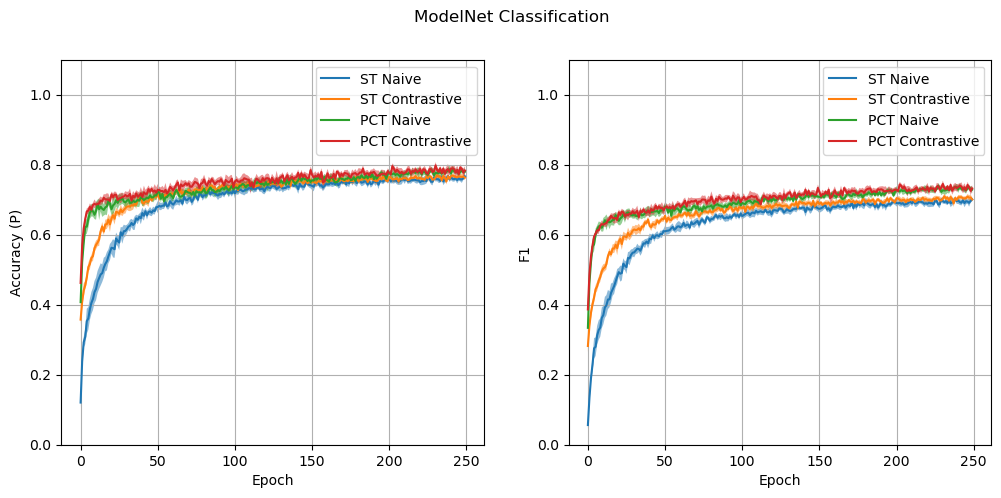

In [31]:
data_accuracy = [validation_accuracies_naive, validation_accuracies_contrast, validation_accuracies_naive_pct, validation_accuracies_contrast_pct]
labels_accuracy = ['ST Naive','ST Contrastive','PCT Naive','PCT Contrastive']
data_f1 = [validation_f1_naive, validation_f1_contrast, validation_f1_naive_pct, validation_f1_contrast_pct]
labels_f1 = ['ST Naive','ST Contrastive','PCT Naive','PCT Contrastive']
title = 'ModelNet Classification'

subplot_accuracies(results1 = data_accuracy, labels1=labels_accuracy, y_label1 = 'Accuracy (P)',results2=data_f1,labels2=labels_f1, y_label2 = 'F1', suptitle = title)